# DAT210x - Programming with Python for DS

## Module4- Lab3

This code is intentionally missing! Read the directions on the course lab page!

New Variances:
 age               1.006369
bp                1.006369
sg                1.006369
al                1.006369
su                1.006369
bgr               1.006369
bu                1.006369
sc                1.006369
sod               1.006369
pot               1.006369
hemo              1.006369
pcv               1.006369
wc                1.006369
rc                1.006369
rbc_abnormal      1.006369
rbc_normal        1.006369
pc_abnormal       1.006369
pc_normal         1.006369
pcc_notpresent    1.006369
pcc_present       1.006369
ba_notpresent     1.006369
ba_present        1.006369
htn_no            1.006369
htn_yes           1.006369
dm_no             1.006369
dm_yes            1.006369
cad_no            1.006369
cad_yes           1.006369
appet_good        1.006369
appet_poor        1.006369
pe_no             1.006369
pe_yes            1.006369
ane_no            1.006369
ane_yes           1.006369
dtype: float64
New Describe:
                 age            bp   

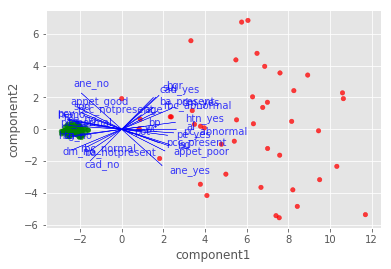

In [25]:
# .. your code here ..
import math
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from sklearn import preprocessing
from sklearn.decomposition import PCA



plt.style.use('ggplot')
df=pd.read_csv('Datasets/kidney_disease.csv')
df
df.dropna(axis=0,inplace=True)

df


def scaleFeaturesDF(df):
    # Feature scaling is a type of transformation that only changes the
    # scale, but not number of features. Because of this, we can still
    # use the original dataset's column names... so long as we keep in
    # mind that the _units_ have been altered:

    scaled = preprocessing.StandardScaler().fit_transform(df)
    scaled = pd.DataFrame(scaled, columns=df.columns)
    
    print("New Variances:\n", scaled.var())
    print("New Describe:\n", scaled.describe())
    return scaled



def drawVectors(transformed_features, components_, columns, plt, scaled):
    if not scaled:
        return plt.axes() # No cheating ;-)

    num_columns = len(columns)

    # This funtion will project your *original* feature (columns)
    # onto your principal component feature-space, so that you can
    # visualize how "important" each one was in the
    # multi-dimensional scaling

    # Scale the principal components by the max value in
    # the transformed set belonging to that component
    xvector = components_[0] * max(transformed_features[:,0])
    yvector = components_[1] * max(transformed_features[:,1])

    ## visualize projections

    # Sort each column by it's length. These are your *original*
    # columns, not the principal components.
    important_features = { columns[i] : math.sqrt(xvector[i]**2 + yvector[i]**2) for i in range(num_columns) }
    important_features = sorted(zip(important_features.values(), important_features.keys()), reverse=True)
    print("Features by importance:\n", important_features)

    ax = plt.axes()

    for i in range(num_columns):
        # Use an arrow to project each original feature as a
        # labeled vector on your principal component axes
        plt.arrow(0, 0, xvector[i], yvector[i], color='b', width=0.0005, head_width=0.02, alpha=0.75)
        plt.text(xvector[i]*1.2, yvector[i]*1.2, list(columns)[i], color='b', alpha=0.75)

    return ax


scaleFeatures = True
labels = ['red' if i=='ckd' else 'green' for i in df.classification]

data=df.drop(labels=['id', 'classification'],axis=1)



data 

#data=data.transpose()
data.pcv=pd.to_numeric(df.pcv)
data.wc=pd.to_numeric(df.wc)
data.rc=pd.to_numeric(df.rc)
data.dtypes
#include All the features in your visualization
data=pd.get_dummies(data)
 

    
if scaleFeatures: data = scaleFeaturesDF(data)
    
pca=PCA(n_components=2,svd_solver='full')
pca.fit(data)
data.shape
T=pca.transform(data)
T.shape
T
    
ax = drawVectors(T, pca.components_, data.columns.values, plt, scaleFeatures)
T  = pd.DataFrame(T)
T.columns = ['component1', 'component2']
T.plot.scatter(x='component1', y='component2', marker='o', c=labels, alpha=0.75, ax=ax)

plt.show()   
